In [70]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import librosa
import numpy as np
import io
%matplotlib inline

In [71]:
sr = 16000
e_file1 = 'C:/nmb/nmb_data/testvoice_M2.wav'

# 10 seconds of each file
data, rate = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=5)
data = data

In [72]:
import sounddevice as sd

sd.play(data, rate)

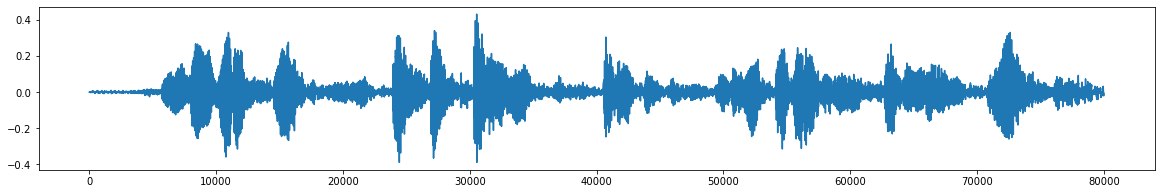

In [73]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

## add noise

In [74]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

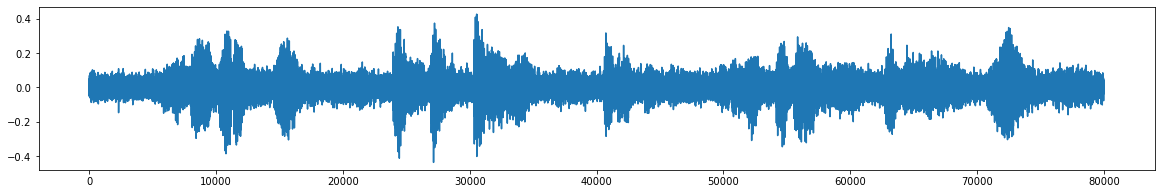

In [75]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [76]:
import sounddevice as sd

sd.play(audio_clip_band_limited, rate)

## remove noise



  0%|          | 0/7 [00:00<?, ?it/s]

STFT on noise:   0%|          | 0/7 [00:00<?, ?it/s]

STFT on signal:  14%|█▍        | 1/7 [00:00<00:00, 143.21it/s]

STFT on signal:  29%|██▊       | 2/7 [00:00<00:00, 200.53it/s]

Generate mask:  43%|████▎     | 3/7 [00:00<00:00, 158.32it/s] 

Smooth mask:  57%|█████▋    | 4/7 [00:00<00:00, 181.92it/s]  

Apply mask:  71%|███████▏  | 5/7 [00:00<00:00, 106.67it/s] 

Recover signal:  86%|████████▌ | 6/7 [00:00<00:00, 117.96it/s]

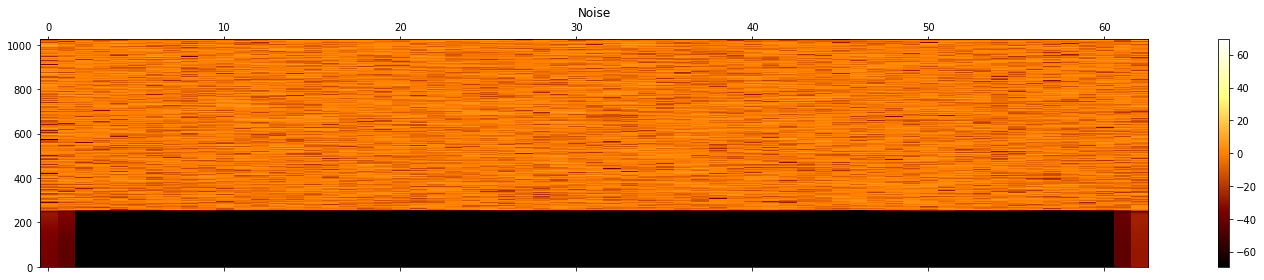

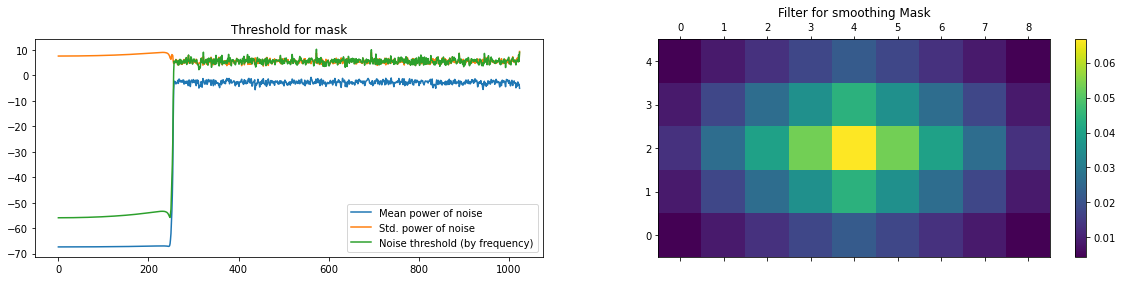

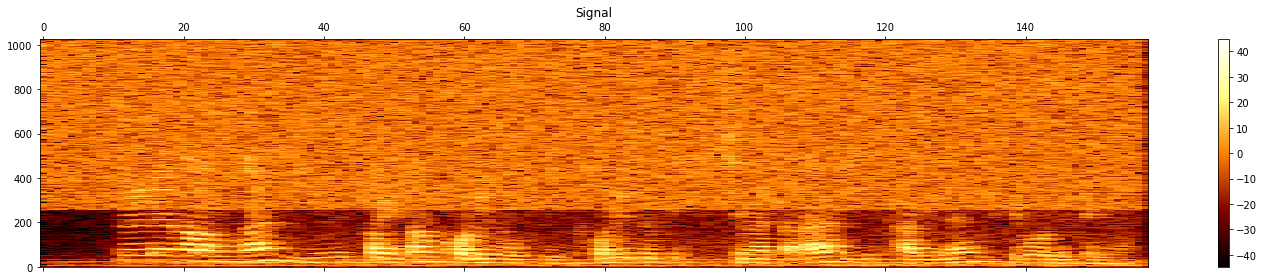

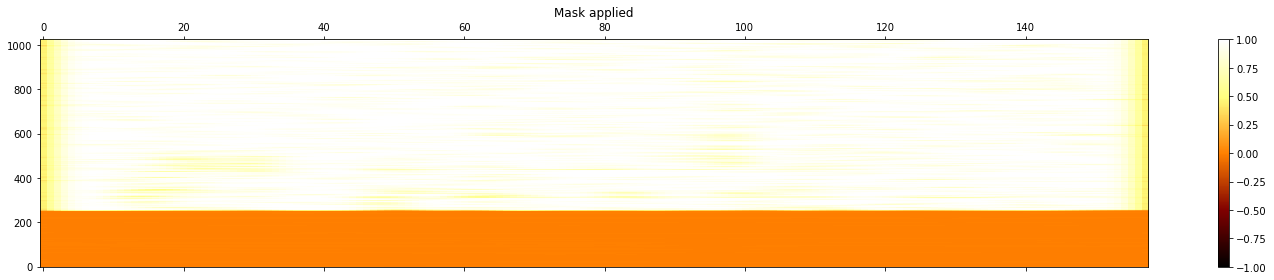

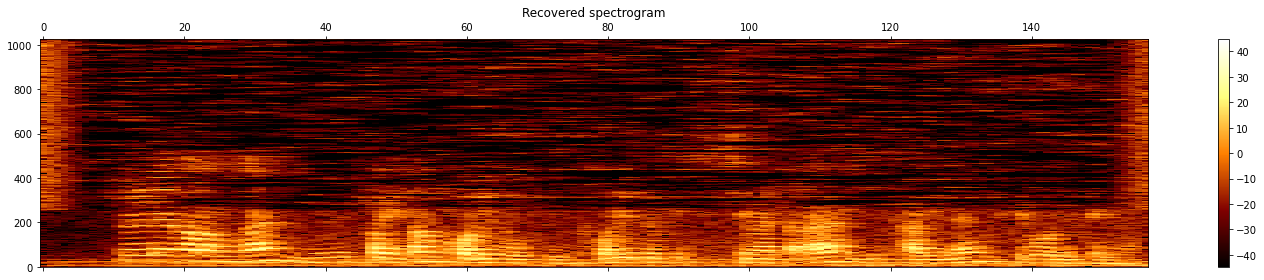

In [77]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, prop_decrease=1.0, verbose=True)

### playback recovered audio

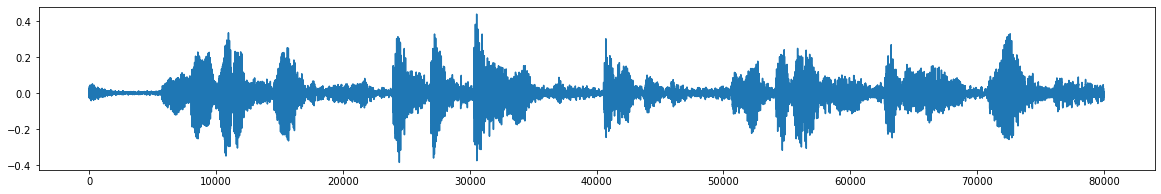

In [78]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(noise_reduced)

In [79]:
import sounddevice as sd

sd.play(noise_reduced, rate)

## A more difficult example

In [153]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
response = urllib.request.urlopen(url)
noise_data[:80000], noise_rate = sf.read(io.BytesIO(response.read()))
print(len(noise_data))

# cut = 80000
# noise_data1 = noise_data[:80000]
# print(len(noise_data1))


ValueError: could not broadcast input array from shape (200542) into shape (80000)

In [147]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise1_data)

NameError: name 'noise1_data' is not defined

In [130]:
import sounddevice as sd

sd.play(noise_data, noise_rate)

In [83]:
max(noise_data)

0.999969482421875

## add noise to data

In [142]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

ValueError: operands could not be broadcast together with shapes (80000,) (200542,) 

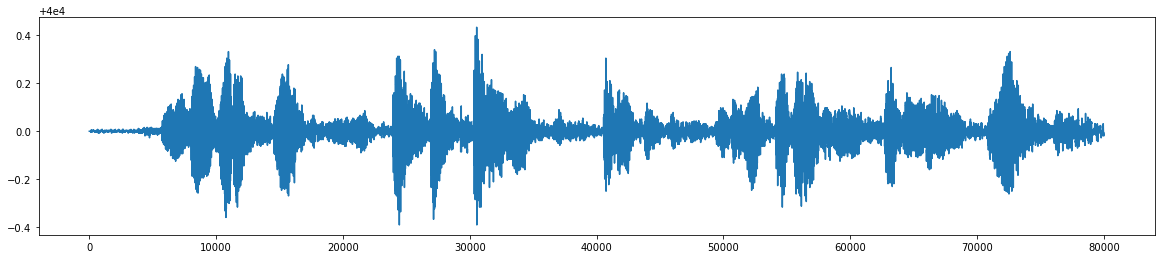

In [139]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)

In [141]:
import sounddevice as sd

sd.play(audio_clip_cafe, noise_rate)